Test the effects of having two candidates of the same party in the general election

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dcols = "Year,Office,District,Party,Cand1,Cand2,General1,General2,Primary1,Primary2,DIME1,DIME2".split(',')

In [3]:
vote = pd.read_csv("dataset.csv", sep=';', names=dcols)
vote.head(5)

,Year,Office,District,Party,Cand1,Cand2,General1,General2,Primary1,Primary2,DIME1,DIME2
0,2012,Assembly,1,REP,Brian Dahle,Rick Bosetti,116098,60920,41384,34457,0.30,0.57
1,2012,Assembly,5,REP,Frank Bigelow,Rico Oller,82293,75071,29584,34673,0.39,0.55
2,2012,Assembly,6,REP,Beth B Gaines,Andy Pugno,128465,57084,38827,33382,0.33,1.58
3,2012,Assembly,10,DEM,Michael Allen,Marc Levine,91973,96421,32922,25920,-1.04,-0.50
4,2012,Assembly,18,DEM,Rob Bonta,Abel Guillen,75865,74422,23007,18521,-0.93,-1.20


Show the minimum and maximum DIME scores for both parties

In [6]:
for cl in 'DIME1', 'DIME2':
    print("The lowest Republican score is {}".format(vote.loc[vote.Party == 'REP'][cl].min()))
    print("The highest Democratic score is {}".format(vote.loc[vote.Party == 'DEM'][cl].max()))

The lowest Republican score is 0.3
The highest Democratic score is -0.51
The lowest Republican score is 0.09
The highest Democratic score is -0.5


Calculate share of the two-candidate vote in both elections, the change between the elections and the difference in DIME scores

In [7]:
vote['GenShare'] = vote.General1 / (vote.General1 + vote.General2)
vote['PriShare'] = vote.Primary1 / (vote.Primary1 + vote.Primary2)
vote['VoteChange'] = vote.GenShare - vote.PriShare
vote['DIMEChange'] = vote.DIME1 - vote.DIME2
vote.head(5)

,Year,Office,District,Party,Cand1,Cand2,General1,General2,Primary1,Primary2,DIME1,DIME2,GenShare,PriShare,VoteChange,DIMEChange
0,2012,Assembly,1,REP,Brian Dahle,Rick Bosetti,116098,60920,41384,34457,0.30,0.57,0.655854,0.545668,0.110186,-0.27
1,2012,Assembly,5,REP,Frank Bigelow,Rico Oller,82293,75071,29584,34673,0.39,0.55,0.522947,0.460401,0.062546,-0.16
2,2012,Assembly,6,REP,Beth B Gaines,Andy Pugno,128465,57084,38827,33382,0.33,1.58,0.692351,0.537703,0.154648,-1.25
3,2012,Assembly,10,DEM,Michael Allen,Marc Levine,91973,96421,32922,25920,-1.04,-0.50,0.488195,0.559498,-0.071303,-0.54
4,2012,Assembly,18,DEM,Rob Bonta,Abel Guillen,75865,74422,23007,18521,-0.93,-1.20,0.504801,0.554012,-0.049211,0.27


Multiply the DIMEChange column by -1 for Republicans so that the column would reflect the same direction from the middle for both parties

In [8]:
vote.loc[vote.Party == 'REP', 'DIMEChange'] *=  -1
vote[['Party','DIME1','DIME2','DIMEChange']].head(5)

,Party,DIME1,DIME2,DIMEChange
0,REP,0.30,0.57,0.27
1,REP,0.39,0.55,0.16
2,REP,0.33,1.58,1.25
3,DEM,-1.04,-0.50,-0.54
4,DEM,-0.93,-1.20,0.27


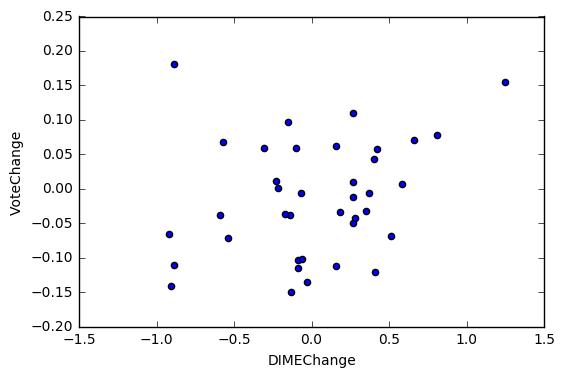

In [9]:
vote.plot.scatter('DIMEChange', 'VoteChange')

### Figure 1
A scatter plot showing how the vote changes from the primary to the general election based on the difference in the DIME score of the two candidates. There is a definite outlier in the top left which goes in the opposite direction from what is expected.

In [10]:
import statsmodels.api as sm
model = sm.OLS(vote.VoteChange, sm.add_constant(vote.DIMEChange)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             VoteChange   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.834
Date:                Thu, 06 Apr 2017   Prob (F-statistic):              0.101
Time:                        19:59:55   Log-Likelihood:                 42.000
No. Observations:                  38   AIC:                            -80.00
Df Residuals:                      36   BIC:                            -76.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0144      0.013     -1.075      0.290        -0.041     0.013
DIMEChange     0.0462      0.027      1.684      0.101        -0.009     0.102
==============================================================================
Omnibus:                        2.740   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                1.831
Skew:                           0.524   Prob(JB):                        0.400
Kurtosis:                       3.237   Cond. No.                         2.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results are not quite significant, but take a look at the outlier.

In [11]:
vote.loc[(vote.VoteChange > .15) & (vote.DIMEChange < .5)]

,Year,Office,District,Party,Cand1,Cand2,General1,General2,Primary1,Primary2,DIME1,DIME2,GenShare,PriShare,VoteChange,DIMEChange
33,2014,Reps,35,DEM,Christina Gagnier,Norma J Torres,22753,39502,4081,17996,-1.61,-0.72,0.365481,0.184853,0.180628,-0.89


Looking at the election for Congressional District 35 in 2014, there was no Republican on the ballot in the primary, although there was a Republican write-in. This would explain why the moderate did not improve in the general election. He could have gained nearly all of the Republican votes in the primary and the liberal Democratic votes could have consolidated around his opponent. Try the regression again without this outlier.

In [13]:
wooutlie = vote.loc[(vote.VoteChange < .15) | (vote.DIMEChange > -.5)]
model_nooutlie = sm.OLS(wooutlie.VoteChange, sm.add_constant(wooutlie.DIMEChange)).fit()
model_nooutlie.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             VoteChange   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     8.426
Date:                Thu, 06 Apr 2017   Prob (F-statistic):            0.00636
Time:                        20:05:13   Log-Likelihood:                 45.941
No. Observations:                  37   AIC:                            -87.88
Df Residuals:                      35   BIC:                            -84.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0218      0.012     -1.835      0.075        -0.046     0.002
DIMEChange     0.0730      0.025      2.903      0.006         0.022     0.124
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.954
Skew:                           0.030   Prob(JB):                        0.621
Kurtosis:                       2.216   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Substantial improvement. Should look to see if there are other elections in which only one party was represented in the primary.